In [1]:
import pandas as pd
import numpy as np
from ta import *
dow_df = pd.read_csv('Dow_technical_indicator_labels.csv')

In [2]:
test_year_dates = ['8/1/2018','8/30/2019']
t1year = ['3/7/2017','7/30/2018']
t5year = ['7/1/2013','7/30/2018']

# train_type should be ['1_year','5_year','all']
def get_recent_test_train(df, train_type):
    try:
        df = df.set_index('Date')
    except:
        pass
    test = df.loc[test_year_dates[0]:test_year_dates[1]]
    if train_type == '1_year':
        train = df.loc[t1year[0]:t1year[1]]
    elif train_type == '5_year':
        train = df.loc[t5year[0]:t5year[1]]
    elif train_type == 'all':
        train = df.loc[:t1year[1]]
    else:
        print("train_type must be one of the following:")
        print('1_year, ','5_year, ','or all')
        return(0,0)
    return(train, test)

In [3]:
!pip install sklearn

In [4]:
X = dow_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = dow_df['dow_labels']
train_data_1year_dow, test_data_1year_dow = get_recent_test_train(dow_df, '1_year')
X_train_1year_dow = train_data_1year_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_1year_dow = test_data_1year_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_1year_dow = train_data_1year_dow[['dow_labels']]
y_test_1year_dow = test_data_1year_dow[['dow_labels']]

In [5]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_1year_dow, y_train_1year_dow)

y_predict = model.predict(X_test_1year_dow)

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_1year_dow, y_predict)

0.47619047619047616

In [7]:
tree.export_graphviz(model, out_file='1year_dow_tree.dot', feature_names=X.columns)

In [8]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('1year_dow_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

/bin/sh: 1: pip3: not found


<Figure size 640x480 with 1 Axes>

In [9]:
import pydot

(graph,) = pydot.graph_from_dot_file('1year_dow_tree.dot')
graph.write_png('1year_dow_decisiontree.png')

In [10]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_1year_dow, y_train_1year_dow)

#Predict the response for test dataset
y_pred = clf.predict(X_test_1year_dow)

# Model Accuracy, how often is the classifier correct?
accuracy_score(y_test_1year_dow, y_pred)

0.4725274725274725

In [11]:
tree.export_graphviz(clf, out_file='1year_dow_tree_pruned.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


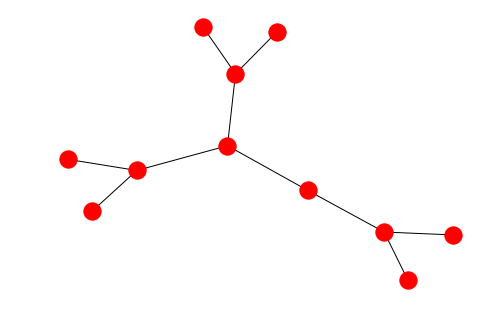

In [12]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('1year_dow_tree_pruned.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [13]:
import pydot

(graph,) = pydot.graph_from_dot_file('1year_dow_tree_pruned.dot')
graph.write_png('1year_dow_decisiontree_pruned.png')

In [14]:
X = dow_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = dow_df['dow_labels']
train_data_5year_dow, test_data_5year_dow = get_recent_test_train(dow_df, '5_year')
X_train_5year_dow = train_data_5year_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_5year_dow = test_data_5year_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_5year_dow = train_data_5year_dow[['dow_labels']]
y_test_5year_dow = test_data_5year_dow[['dow_labels']]

In [15]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_5year_dow, y_train_5year_dow)

y_predict = model.predict(X_test_5year_dow)

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_5year_dow, y_predict)

0.4468864468864469

In [17]:
tree.export_graphviz(model, out_file='5year_dow_tree.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


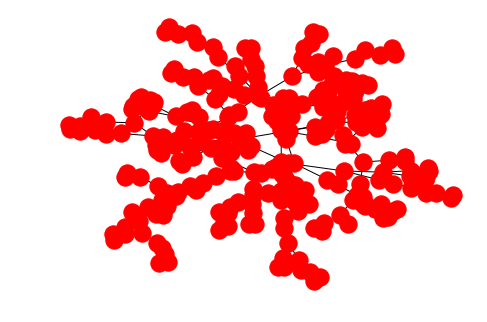

In [18]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('5year_dow_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [19]:
import pydot

(graph,) = pydot.graph_from_dot_file('5year_dow_tree.dot')
graph.write_png('5year_dow_decisiontree.png')

In [20]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_5year_dow, y_train_5year_dow)

#Predict the response for test dataset
y_pred = clf.predict(X_test_5year_dow)

# Model Accuracy, how often is the classifier correct?
accuracy_score(y_test_5year_dow, y_pred)

0.4725274725274725

In [21]:
tree.export_graphviz(clf, out_file='5year_dow_tree_pruned.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


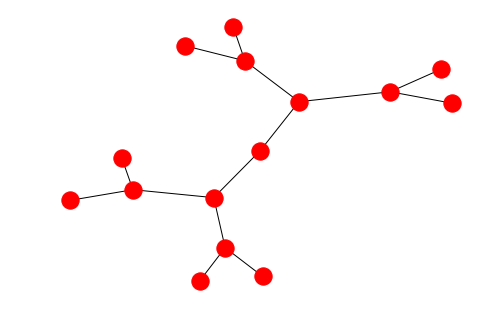

In [22]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('5year_dow_tree_pruned.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [23]:
import pydot

(graph,) = pydot.graph_from_dot_file('5year_dow_tree_pruned.dot')
graph.write_png('5year_dow_decisiontree_pruned.png')

In [24]:
X = dow_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = dow_df['dow_labels']
train_data_all_dow, test_data_all_dow = get_recent_test_train(dow_df, 'all')
X_train_all_dow = train_data_all_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_all_dow = test_data_all_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_all_dow = train_data_all_dow[['dow_labels']]
y_test_all_dow = test_data_all_dow[['dow_labels']]

In [25]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_all_dow, y_train_all_dow)

y_predict = model.predict(X_test_all_dow)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_all_dow, y_predict)

0.47619047619047616

In [27]:
tree.export_graphviz(model, out_file='all_dow_tree.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


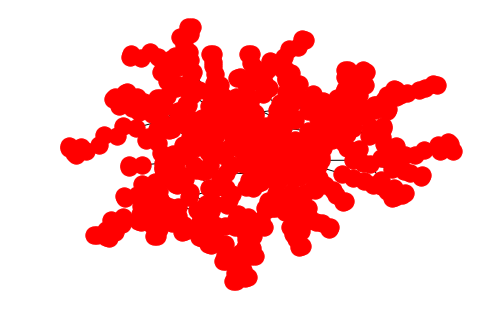

In [28]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('all_dow_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [29]:
import pydot

(graph,) = pydot.graph_from_dot_file('all_dow_tree.dot')
graph.write_png('all_dow_decisiontree.png')

In [30]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_all_dow, y_train_all_dow)

#Predict the response for test dataset
y_pred = clf.predict(X_test_all_dow)

# Model Accuracy, how often is the classifier correct?
accuracy_score(y_test_all_dow, y_pred)

0.47985347985347987

In [31]:
tree.export_graphviz(clf, out_file='all_dow_tree_pruned.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


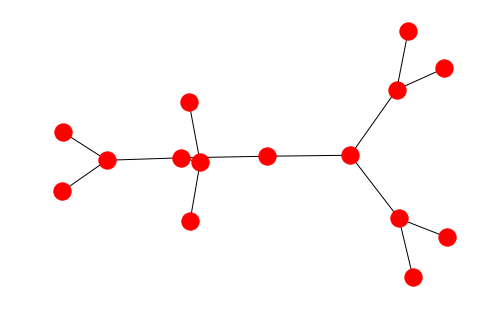

In [32]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('all_dow_tree_pruned.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [33]:
import pydot

(graph,) = pydot.graph_from_dot_file('all_dow_tree_pruned.dot')
graph.write_png('all_dow_decisiontree_pruned.png')

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = dow_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = dow_df['dow_labels']
train_data_1year_dow, test_data_1year_dow = get_recent_test_train(dow_df, '1_year')
X_train_1year_dow = train_data_1year_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_1year_dow = test_data_1year_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_1year_dow = train_data_1year_dow[['dow_labels']]
y_test_1year_dow = test_data_1year_dow[['dow_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_1year_dow, y_train_1year_dow.values.ravel())
y_pred = model.predict(X_test_1year_dow)

print(confusion_matrix(y_test_1year_dow,y_pred))
print(classification_report(y_test_1year_dow,y_pred))
print(accuracy_score(y_test_1year_dow, y_pred))

[[ 22   1  90]
 [  6   1  22]
 [ 22   4 105]]
              precision    recall  f1-score   support

        -1.0       0.44      0.19      0.27       113
         0.0       0.17      0.03      0.06        29
         1.0       0.48      0.80      0.60       131

   micro avg       0.47      0.47      0.47       273
   macro avg       0.36      0.34      0.31       273
weighted avg       0.43      0.47      0.41       273

0.46886446886446886


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = dow_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = dow_df['dow_labels']
train_data_5year_dow, test_data_5year_dow = get_recent_test_train(dow_df, '5_year')
X_train_5year_dow = train_data_5year_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_5year_dow = test_data_5year_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_5year_dow = train_data_5year_dow[['dow_labels']]
y_test_5year_dow = test_data_5year_dow[['dow_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_5year_dow, y_train_5year_dow.values.ravel())
y_pred = model.predict(X_test_5year_dow)

print(confusion_matrix(y_test_5year_dow,y_pred))
print(classification_report(y_test_5year_dow,y_pred))
print(accuracy_score(y_test_5year_dow, y_pred))

[[28  2 83]
 [ 7  1 21]
 [32  1 98]]
              precision    recall  f1-score   support

        -1.0       0.42      0.25      0.31       113
         0.0       0.25      0.03      0.06        29
         1.0       0.49      0.75      0.59       131

   micro avg       0.47      0.47      0.47       273
   macro avg       0.38      0.34      0.32       273
weighted avg       0.43      0.47      0.42       273

0.4652014652014652


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = dow_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = dow_df['dow_labels']
train_data_all_dow, test_data_all_dow = get_recent_test_train(dow_df, 'all')
X_train_all_dow = train_data_all_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_all_dow = test_data_all_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_all_dow = train_data_all_dow[['dow_labels']]
y_test_all_dow = test_data_all_dow[['dow_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_all_dow, y_train_all_dow.values.ravel())
y_pred = model.predict(X_test_all_dow)

print(confusion_matrix(y_test_all_dow,y_pred))
print(classification_report(y_test_all_dow,y_pred))
print(accuracy_score(y_test_all_dow, y_pred))

[[ 14   0  99]
 [  2   0  27]
 [ 16   1 114]]
              precision    recall  f1-score   support

        -1.0       0.44      0.12      0.19       113
         0.0       0.00      0.00      0.00        29
         1.0       0.47      0.87      0.61       131

   micro avg       0.47      0.47      0.47       273
   macro avg       0.30      0.33      0.27       273
weighted avg       0.41      0.47      0.37       273

0.46886446886446886


In [37]:
b1 = ['4/1/1991','4/30/1993']
b2 = ['12/3/2001','12/31/2003']
b3 = ['7/1/2009','7/29/2011']

def get_boom_test_train(df):
    try:
        df = df.set_index('Date')
    except:
        pass
    train = pd.concat([df.loc[b1[0]:b1[1]],df.loc[b2[0]:b2[1]]])
    test = df.loc[b3[0]:b3[1]]
    return(train, test)

In [38]:
X = dow_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = dow_df['dow_labels']
train_data_boom_dow, test_data_boom_dow = get_boom_test_train(dow_df)
X_train_boom_dow = train_data_boom_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_boom_dow = test_data_boom_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_boom_dow = train_data_boom_dow[['dow_labels']]
y_test_boom_dow = test_data_boom_dow[['dow_labels']]

In [39]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_boom_dow, y_train_boom_dow)

y_predict = model.predict(X_test_boom_dow)

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_boom_dow, y_predict)

0.38857142857142857

In [41]:
tree.export_graphviz(model, out_file='boom_dow_tree.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


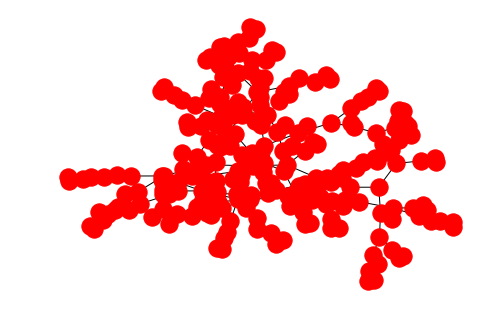

In [42]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('boom_dow_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [43]:
import pydot

(graph,) = pydot.graph_from_dot_file('boom_dow_tree.dot')
graph.write_png('boom_dow_decisiontree.png')

In [44]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_boom_dow, y_train_boom_dow)

#Predict the response for test dataset
y_pred = clf.predict(X_test_boom_dow)

# Model Accuracy, how often is the classifier correct?
accuracy_score(y_test_boom_dow, y_pred)

0.40190476190476193

In [45]:
tree.export_graphviz(clf, out_file='boom_dow_tree_pruned.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


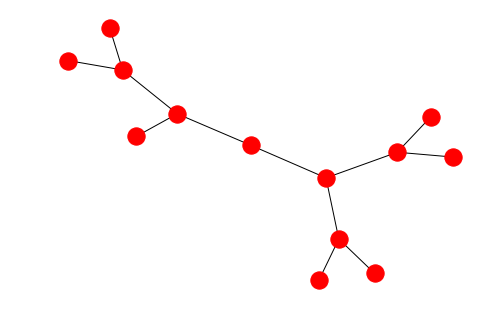

In [46]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('boom_dow_tree_pruned.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [47]:
import pydot

(graph,) = pydot.graph_from_dot_file('boom_dow_tree_pruned.dot')
graph.write_png('boom_dow_decisiontree_pruned.png')

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = dow_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = dow_df['dow_labels']
train_data_boom_dow, test_data_boom_dow = get_boom_test_train(dow_df)
X_train_boom_dow = train_data_boom_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_boom_dow = test_data_boom_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_boom_dow = train_data_boom_dow[['dow_labels']]
y_test_boom_dow = test_data_boom_dow[['dow_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_boom_dow, y_train_boom_dow.values.ravel())
y_pred = model.predict(X_test_boom_dow)

print(confusion_matrix(y_test_boom_dow,y_pred))
print(classification_report(y_test_boom_dow,y_pred))
print(accuracy_score(y_test_boom_dow, y_pred))

[[113   7  72]
 [ 45   3  13]
 [170  11  91]]
              precision    recall  f1-score   support

        -1.0       0.34      0.59      0.43       192
         0.0       0.14      0.05      0.07        61
         1.0       0.52      0.33      0.41       272

   micro avg       0.39      0.39      0.39       525
   macro avg       0.33      0.32      0.30       525
weighted avg       0.41      0.39      0.38       525

0.3942857142857143


In [49]:
r1 = ['3/1/1989','3/28/1991']
r2 = ['11/1/1999','11/30/2001']
r3 = ['6/1/2007','6/30/2009']

def get_recession_test_train(df):
    try:
        df = df.set_index('Date')
    except:
        pass
    train = pd.concat([df.loc[r1[0]:r1[1]],df.loc[r2[0]:r2[1]]])
    test = df.loc[r3[0]:r3[1]]
    return(train, test)

In [50]:
X = dow_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = dow_df['dow_labels']
train_data_recession_dow, test_data_recession_dow = get_recession_test_train(dow_df)
X_train_recession_dow = train_data_recession_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_recession_dow = test_data_recession_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_recession_dow = train_data_recession_dow[['dow_labels']]
y_test_recession_dow = test_data_recession_dow[['dow_labels']]

In [51]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_recession_dow, y_train_recession_dow)

y_predict = model.predict(X_test_recession_dow)

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_recession_dow, y_predict)

0.4

In [53]:
tree.export_graphviz(model, out_file='recession_dow_tree.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


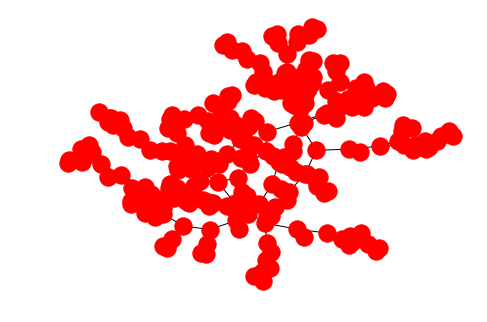

In [54]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('recession_dow_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [55]:
import pydot

(graph,) = pydot.graph_from_dot_file('recession_dow_tree.dot')
graph.write_png('recession_dow_decisiontree.png')

In [56]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_recession_dow, y_train_recession_dow)

#Predict the response for test dataset
y_pred = clf.predict(X_test_recession_dow)

# Model Accuracy, how often is the classifier correct?
accuracy_score(y_test_recession_dow, y_pred)

0.36

In [57]:
tree.export_graphviz(clf, out_file='recession_dow_tree_pruned.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


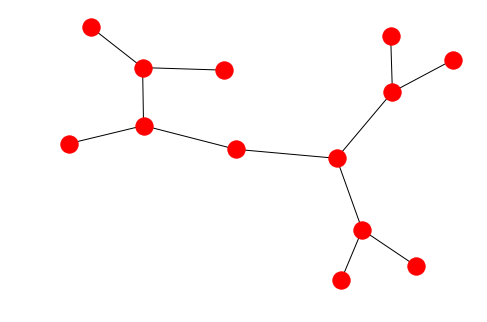

In [58]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('recession_dow_tree_pruned.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [59]:
import pydot

(graph,) = pydot.graph_from_dot_file('recession_dow_tree_pruned.dot')
graph.write_png('recession_dow_decisiontree_pruned.png')

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = dow_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = dow_df['dow_labels']
train_data_recession_dow, test_data_recession_dow = get_recession_test_train(dow_df)
X_train_recession_dow = train_data_recession_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_recession_dow = test_data_recession_dow[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_recession_dow = train_data_recession_dow[['dow_labels']]
y_test_recession_dow = test_data_recession_dow[['dow_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_recession_dow, y_train_recession_dow.values.ravel())
y_pred = model.predict(X_test_recession_dow)

print(confusion_matrix(y_test_recession_dow,y_pred))
print(classification_report(y_test_recession_dow,y_pred))
print(accuracy_score(y_test_recession_dow, y_pred))

[[ 66   1 182]
 [ 24   1  85]
 [ 36   0 130]]
              precision    recall  f1-score   support

        -1.0       0.52      0.27      0.35       249
         0.0       0.50      0.01      0.02       110
         1.0       0.33      0.78      0.46       166

   micro avg       0.38      0.38      0.38       525
   macro avg       0.45      0.35      0.28       525
weighted avg       0.46      0.38      0.32       525

0.37523809523809526
